# Titanic - Machine Learning from Disaster

# Steps 
1. import packages
2. load train and test dataset
3. visualise the datasets
4. feature engineering
5. feature selection
6. model building scikit learn 
7. documenting 

## 1. Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
%matplotlib inline
np.set_printoptions(precision=5)

## 2. Load training and test dataset

In [2]:
train = pd.read_csv("train.csv")
dfSummary(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("test.csv")
test['Survived'] = np.NaN
dfSummary(test)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


## 3. Visualise the datasets

In [4]:
#Let us divide the columns into numeric and categorical types and further analyse the data
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Sex','Pclass','Survived','Cabin','Embarked','Ticket']]

#### Operating the numerical columns

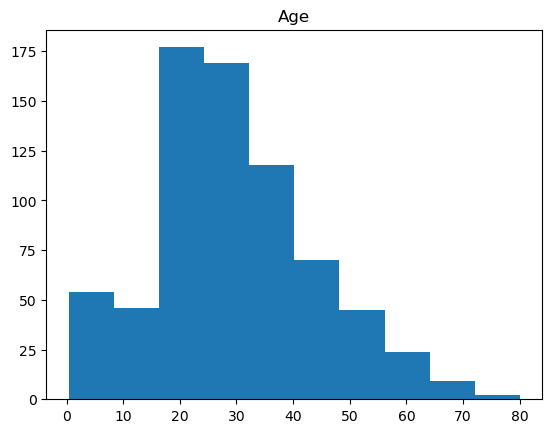

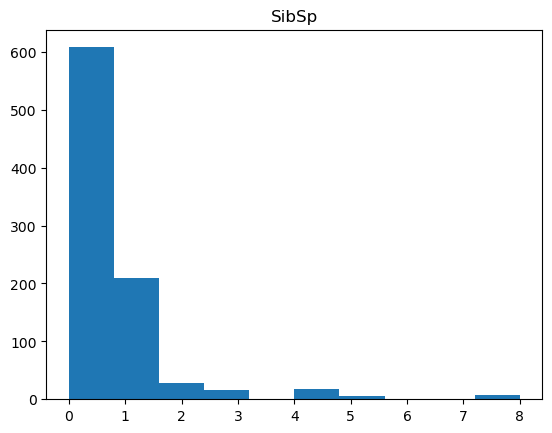

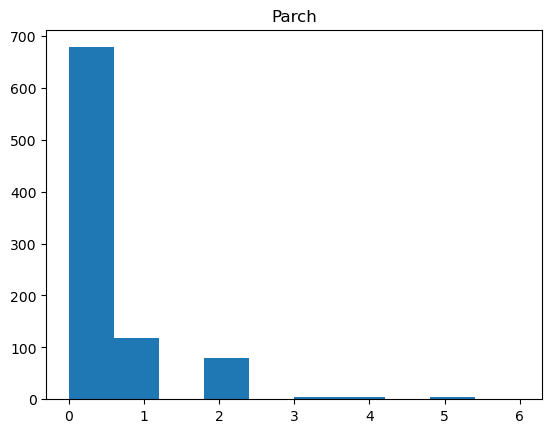

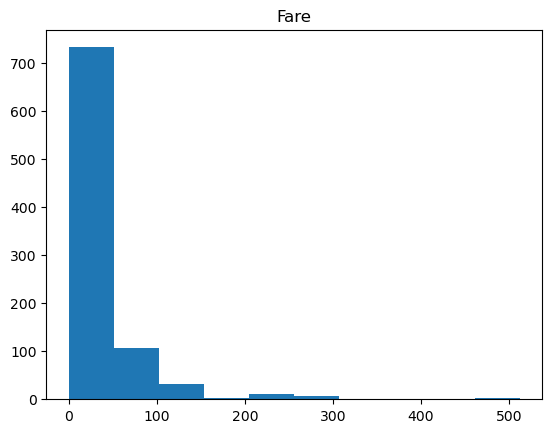

In [5]:
for i in df_num:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [6]:
dfSummary(df_num)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[float64],Mean (sd) : 29.7 (14.5)min < med < max:0.4 < 28.0 < 80.0IQR (CV) : 17.9 (2.0),88 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACg0lEQVR4nO3dQY7aMBSA4edmQAGkRIgKdlygUhcsOUQP2yMUiRNwA3ZIURRESkQI6abTTWcY4iTFz/2/vYUXvyAxtmzquhbAdZ+ePQHgES/PnsA9xpiRiAwth1/quj53OR88j7OhGmNGs9nsWxRFU5vxx+MxNcZ8J1Y/OBuqiAyjKJqu1+tzHMdFk4FZloXb7XaaJMlQRAjVAy6HKiIicRwX8/n8Z9NxVVVFIhIZY2w/mkcHhzgfqo08zwdlWX5dLpdBEASNvo1f8ejgFi9DvVwuL2EYjlerVbFYLNKm43l0cI+Xob6aTCZWjw2/jTqdDFphHRUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChW83jjdRlVVA7E/c8V5q44R6hvanrnivFX3CPUNbc5ccd6qH4R6R4szV5y36hgvU1CBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKrDNrwecDugeoXaM0wH9INSOcTqgH4TaE04HdIuXKahAqFDhw59+riKHC+6GylXkcMVH36hcRQ4nPPTW/6SryKPb7TawGahZyz8LRDx93OpteartwndZlmFVVV+KovghIrYX76rC9e3v6y3UtleR7/f76W63G1+v16CP+bmI69vf1/uCv+3Cd5qm/+3CN9e3/411VKhAqFCBUKECoUIFdk95xtdN24TqEZ83bROqR3zetE2oHvJx0zYvU1CBUKECP/34w+WdW4QKEXF/5xahQkS62bm12WzmSZJ8NsYcbaZwL/CHQs2yLGz6qafTKRQRyfM8PBwO4385XutnuzBvW+fzudc13F+aMrK5pmPjbQAAAABJRU5ErkJggg=="">",177(19.9%)
2,SibSp[int64],1. 02. 13. 24. 45. 36. 87. 5,608 (68.2%)209 (23.5%)28 (3.1%)18 (2.0%)16 (1.8%)7 (0.8%)5 (0.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC4ElEQVR4nO3dQW7bVgBF0S9DCJoJBUGAF6NFZLFdhHZjGNagDjJRB3WKtpHTgcsrij1n5tkHfE2KAh+8uVwuAwoPtz4A/x9iIyM2MmIjIzYymzHG5zHGp1sfhH/17XK5vN76EB+xPRwOX6Zp2t/6IPzc+Xx+3mw2v95zcNtpmvbH4/F1t9t9vfVhuO7l5eWX0+m0f3p6+jTGuN/Yxhhjt9t9fXx8/O3Wh+GnPt/6AB/lAYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3Mdow/XmG59UF431p+P9vz+fx8Op32YwWvsKzZ+Xx+HmN8u/U5PsJr4ffj7l8L31jEU1nile3u/4K5bnGDlzUMO7huUYOXtQw7uG6JgxdPxSvlS10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOzqHXVUs7BPBa3rlrDiojrbBDIWFeRee/K5urCf+7qusrCiTn8sK6ycGIu762rFvFkyrr4UpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MD4MXoxPmcnXwYnTCHLwWTsbghYwHBDL/vI26fTKbv62rrKqY08P3ddXxeHx9i25J63hW5M911dvPVlXMxgMCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmUX9OyHW7a/rKqsqZuW1cDLWVWRc2cgYvJAxeCFj8ELGl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQ8Vo4GYMXMh4QyHy/jQ63T+a2PRwOX8YYw6qKuT1M07S3qqLgMxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nt26JqDKsqZua1cDLWVWRc2cgYvJAxeCHjqw8yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRcYGgYx1FRmf2ciIjYzYyIiNzO+EZiCbrLwo2QAAAABJRU5ErkJggg=="">",0(0.0%)
3,Parch[int64],1. 02. 13. 24. 55. 36. 47. 6,678 (76.1%)118 (13.2%)80 (9.0%)5 (0.6%)5 (0.6%)4 (0.4%)1 (0.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC3ElEQVR4nO3dwW0bVxhG0X8EwrE3JAQCKiHpQUW4WBfBItKDIIiL2PGGWdgBjHglmrxDKOdU8ABfcYbE++DldDoNFO7WPgD/H2IjIzYyYiMjNjLLzHyYmXdrH4SL+3o6nT6vfYgfbfb7/cftdnu/9kG4rOPx+Lwsy6dbCm6z3W7vHx8fP+92uy9rH4bLeHl5eX84HO6fnp7ezcztxDYzs9vtvjw8PPy19mG4qA9rH+C/fEEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjs5n5diVl7YNwObf677k5Ho/Ph8Phfm7wSgrnOx6PzzPzde1z/Mi18Lfr5q6FLxbxVK71yXZzf1Ws7yqDl1scW7C+iw9ebnVswfquNXjxzZaf+FGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIXHxddavLHtZ3lXXVLS57WJ8NAhnrKjK/8snm04tXOXtdZUHFa521rrKg4hy/sq6yoOJV/KhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5qzBi1EL5zh78GLUwmu5Fk7G4IWMLwhk/n2Mjkci17bZ7/cfZ2Yspbi2u+12e/99yuf/HOWqvLORERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZfF9JzVhKcWWuhZOxriLjk42MwQsZgxcyfvogIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELGtXAyBi9kvLOR8RglY11FxrqKjHc2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkXAsnY11FxjsbmbtlWf5YluX92gfh7bubmd9n5re1D8Lb5zFKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTuZubPmfl77YPw9hm8kPEYJSM2MmIjIzYyYiPzD2Qx6Vyi72OZAAAAAElFTkSuQmCC"">",0(0.0%)
4,Fare[float64],Mean (sd) : 32.2 (49.7)min < me

In [7]:
pd.pivot_table(train, index = "Survived",  values = ['Age','SibSp','Parch','Fare'])
# #It gives the mean value of the different features mentioned

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


#### Operating the categorical columns

In [8]:
df_cat = train[['Sex','Pclass','Survived','Embarked','Cabin','Ticket']]

/usr/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


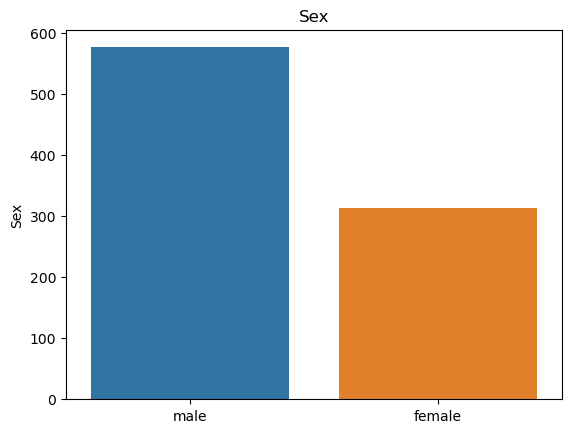

/usr/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


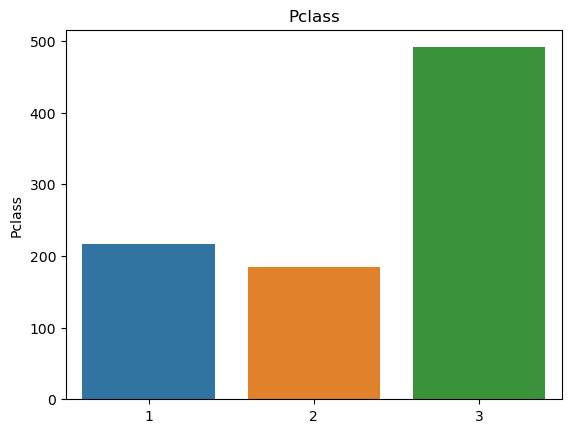

/usr/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


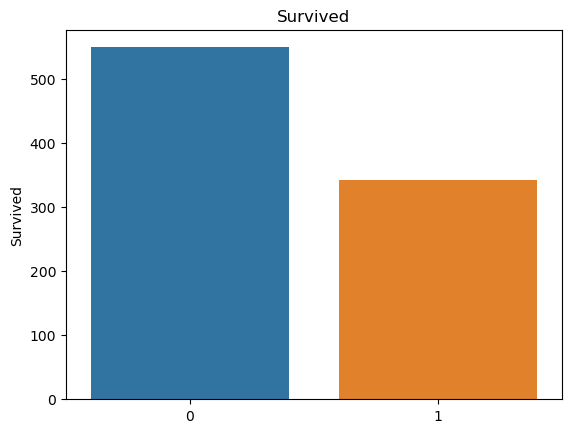

/usr/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


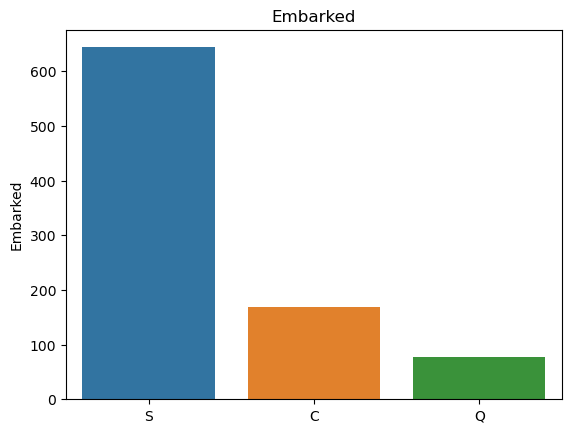

/usr/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


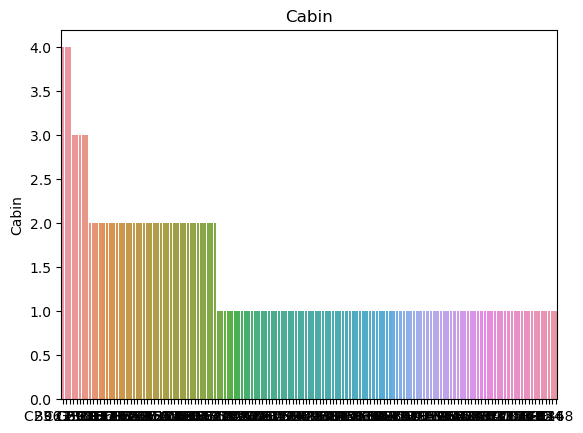

/usr/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


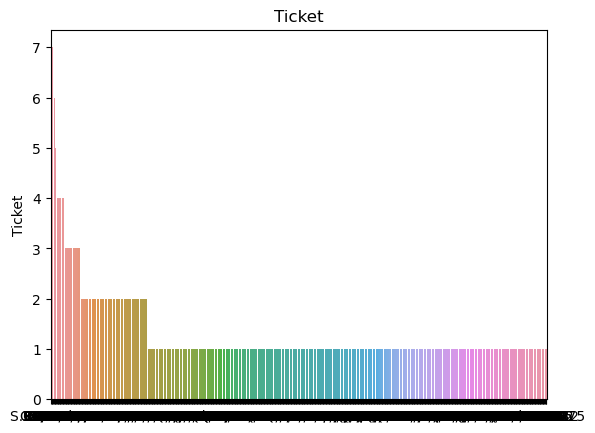

In [9]:
for i in df_cat:
    x = df_cat[i].value_counts().index
    y = df_cat[i].value_counts()
    sns.barplot(x,y).set_title(i)
    plt.show()

In [10]:
pd.pivot_table(train, index = "Survived", columns = "Sex", values = "Ticket", aggfunc = 'count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [11]:
pd.pivot_table(train, index = "Survived", columns = "Pclass", values = "Ticket", aggfunc = "count")

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [12]:
pd.pivot_table(train, index = "Survived", columns = "Embarked", values = "Ticket", aggfunc = "count")

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


* aggfunc='count': This parameter specifies the aggregation function to be used when summarizing the data. In this case, the 'count' function is used to count the number of occurrences of 'Ticket' values for each combination of 'Survived' and 'Pclass'


## 4. Feature Engineering

-  We can see that the cabin and ticket data is too much clumsy to analyze. Thus we apply feature engineering to these columns.

### 4.1 Cabin
- We will separate cabin based on the names, we assign 0 to NaN and 1 to the cabins with names.

In [13]:
train['Cabin']
# train.Ticket.value_counts()

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [14]:
# train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else 1)
train.cabin_multiple.value_counts()

0    687
1    204
Name: cabin_multiple, dtype: int64

In [15]:
pd.pivot_table(train, index = "Survived", columns = "cabin_multiple", values = "Ticket", aggfunc = "count")

cabin_multiple,0,1
Survived,,
0,481,68
1,206,136


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [17]:
test['cabin_multiple'] = test.Cabin.apply(lambda x: 0 if pd.isna(x) else 1)
test.head(-10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_multiple
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S,NaN,0
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,NaN,1
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,NaN,1
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S,NaN,0


In [18]:
train["Age"] = train.Age.fillna(train.Age.median())
test["Age"]  = test.Age.fillna(train.Age.median())

# train["Embarked"] = train.Age.fillna(train.Embarked.median())
# test["Embarked"] = test.Age.fillna(train.Embarked.median())

# sum(test["Age"].isnull())
# sum(train["Age"].isnull())

# print(sum(train["ticket_letter"].isnull()))
# print(sum(train["ticket_num"].isnull()))
# print(sum(test["Embarked"].isnull()))

# print(sum(test["name_title"].isnull()))
# print(sum(test["ticket_num"].isnull()))
# print(sum(test["Pclass"].isnull()))
# sum(train.Cabin.isnull())

## 5. Feature Selection
- We will drop the Name,Ticket and PassengerID columns from the train data as they are less important

- Further we drop the **Survived** column so as to separate the features and the target column

- The features which we want to analyse are the following: 
    1. **"Sex","Pclass","Age","SibSp","Parch","Embarked","cabin_multiple"**

In [19]:
# train = train.drop(['Name', 'PassengerId'], axis=1)
# combine = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
# features = ["Sex","Pclass","Age","SibSp","Parch","Embarked","cabin_multiple"]
# sum(train.Age.isnull())
features = ["Sex","Pclass","Age","SibSp","Parch","Embarked","cabin_multiple"]

y       = train["Survived"]

# train.drop(['PassengerId',"cabin_multiple","cabin_letter","ticket_num","ticket_letter","name_title"],axis = 1, inplace = True)
train.drop(['PassengerId',"Survived"],axis = 1, inplace = True)


- axis=1: This parameter specifies that you want to drop columns, not rows. The value '1' indicates columns, while '0' would indicate rows.

- inplace=True: This parameter specifies that the changes should be made directly to the 'train' DataFrame, and it should be modified in place. Setting it to 'True' ensures that the original DataFrame is modified, and no new DataFrame is returned.

In [21]:
train.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S,0
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


## 6. Model Building 

- pd.get_dummies() function from Pandas is used to perform **one-hot encoding** on the selected features of the 'train' and 'test' DataFrames. This process is essential for converting categorical features into numerical representations that machine learning models can understand.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

X_train = pd.get_dummies(train[features])
X_test  = pd.get_dummies(test[features])

model_lgr  = LogisticRegression(max_iter = 1000)
model_etc  = ExtraTreesClassifier()
model_hgb  = HistGradientBoostingClassifier()
model_rfc  = RandomForestClassifier()

#Fit the model
model_lgr.fit(X_train, y)
model_etc.fit(X_train, y)
model_hgb.fit(X_train, y)
model_rfc.fit(X_train, y)

#Predict the model
pred_lgr = model_lgr.predict(X_test)
pred_etc = model_etc.predict(X_test)
pred_hgb = model_hgb.predict(X_test)
pred_rfc = model_rfc.predict(X_test)

# prediction
y_pred_lgr = np.array(pred_lgr)
y_pred_etc = np.array(pred_etc)
y_pred_hgb = np.array(pred_hgb)
y_pred_rfc = np.array(pred_rfc)

print(f"")
# dfSummary(train)
# print(train.head())
X_train.shape, X_test.shape,y.shape

((891, 10), (418, 10), (891,))

In [23]:
y_0_lgr = np.count_nonzero(y_pred_lgr == 0)
y_1_lgr = np.count_nonzero(y_pred_lgr == 1)
print(f"Logistic Regression\nSurvived=0: {y_0_lgr}\nSurvived=1: {y_1_lgr}\n")

y_0_etc = np.count_nonzero(y_pred_etc == 0)
y_1_etc = np.count_nonzero(y_pred_etc == 1)
print(f"Extra Tree Classifier\nSurvived=0: {y_0_etc}\nSurvived=1: {y_1_etc}\n")

y_0_hgb = np.count_nonzero(y_pred_hgb == 0)
y_1_hgb = np.count_nonzero(y_pred_hgb == 1)
print(f"Hist Gradient Boosting Classifier\nSurvived=0: {y_0_hgb}\nSurvived=1: {y_1_hgb}\n")

y_0_rfc = np.count_nonzero(y_pred_rfc == 0)
y_1_rfc = np.count_nonzero(y_pred_rfc == 1)
print(f"Random Forest Classifier\nSurvived=0: {y_0_rfc}\nSurvived=1: {y_1_rfc}\n")


Logistic Regression
Survived=0: 258
Survived=1: 160

Extra Tree Classifier
Survived=0: 261
Survived=1: 157

Hist Gradient Boosting Classifier
Survived=0: 269
Survived=1: 149

Random Forest Classifier
Survived=0: 263
Survived=1: 155



In [24]:
print(f"Prediction Logistic Regression: \n\n{y_pred_lgr}\n\n")
print(f"Prediction Extra Tree Classifier: \n\n{y_pred_etc}\n\n")
print(f"Prediction HistGradientBoostingClassifier:\n \n{y_pred_hgb}\n\n")
print(f"Prediction Random Forest Classifier: \n\n{y_pred_rfc}\n\n")

Prediction Logistic Regression: 

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]


Prediction Extra Tree Classifier: 

[0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 0

In [25]:
from sklearn.model_selection import cross_val_score

score_lgr = cross_val_score(model_lgr,X_train,y, cv=5, scoring='accuracy')
print("Logistic Regression Accuracy : \t\t\t",score_lgr.mean())

score_etc = cross_val_score(model_etc,X_train,y, cv=5, scoring='accuracy')
print("Extra Tree Classifier Accuracy : \t\t",score_etc.mean())

score_rfc = cross_val_score(model_rfc,X_train,y, cv=5, scoring='accuracy')
print("Random Forest Classifier Accuracy :\t \t",score_rfc.mean())

score_hgb = cross_val_score(model_hgb,X_train,y, cv=5, scoring='accuracy')
print("Hist Gradient Boosting Classifier Accuracy :    ",score_hgb.mean())

Logistic Regression Accuracy : 			 0.7912309334002888
Extra Tree Classifier Accuracy : 		 0.7755696440901387
Random Forest Classifier Accuracy :	 	 0.7969054045571526
Hist Gradient Boosting Classifier Accuracy :     0.8204506936162199


### Create a DataFrame with 'PassengerId' and 'Survived' columns for each model

In [26]:
passengerID = test.PassengerId

df_lgr = pd.DataFrame({"PassengerID":passengerID, "Survived": y_pred_lgr})
df_etc = pd.DataFrame({"PassengerID":passengerID, "Survived": y_pred_etc}) 
df_hgb = pd.DataFrame({"PassengerID":passengerID, "Survived": y_pred_hgb})
df_rfc = pd.DataFrame({"PassengerID":passengerID, "Survived": y_pred_rfc})

###  Save the predictions as separate CSV files

In [27]:
df_lgr.to_csv("prediction_lgr.csv", index = False)
df_etc.to_csv("prediction_etc.csv", index = False)
df_hgb.to_csv("prediction_hgb.csv", index = False)
df_rfc.to_csv("prediction_rfc.csv", index = False)